In [1]:
# Banafsheh Khazali
# Data: March 04, 2023

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
from os import listdir
from os.path import join, isfile

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Label Assignment

In [3]:
# Set the directory containing the CSV files
directory = "/content/drive/My Drive/Data"

# Define a list to store the data and labels
data = []
labels = []

# Loop through the folders
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        # Get the label (folder name)
        label = folder
        
        # Loop through the CSV files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".csv"):
                # Read the CSV file into a list of lists
                with open(os.path.join(folder_path, filename), "r") as f:
                    lines = f.readlines()
                    # Remove the header line if it exists
                    if lines[0].startswith("time"):
                        lines.pop(0)
                    # Extract the data values from the remaining lines
                    data_values = [list(map(float, line.strip().split(",")[1:])) for line in lines if line.strip().split(",")[0] != "time"]
                # Add the data and label to the lists
                data.append(data_values)
                          
                labels.append(label)
                


In [6]:
directory = "/content/drive/My Drive/Data"

# Define a list to store the data and labels
data = []
labels = []

# Loop through the folders
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        # Get the label (folder name)
        label = folder
        
        # Loop through the CSV files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".csv"):
                # Read the CSV file into a list of lists
                with open(os.path.join(folder_path, filename), "r") as f:
                    lines = f.readlines()
                    # Remove the header line if it exists
                    if lines[0].startswith("time"):
                        lines.pop(0)
                    # Extract the data values from the remaining lines
                    data_values = [list(map(float, line.strip().split(",")[1:])) for line in lines if line.strip().split(",")[0] != "time"]
                # Add the data and label to the lists
                data.append(data_values)
                labels.append(label)

# Pad the sequences to make them the same length
X_padded = pad_sequences(data, padding="post", dtype="float32")

# Convert the data and labels to numpy arrays
X = np.array(X_padded)
y = np.array(labels)

# Flatten the data into a 2D array
n_samples, n_timesteps, n_features = X.shape
X_flat = X.reshape((n_samples, n_timesteps * n_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Create a random forest classifier and fit it to the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
score = clf.score(X_test, y_test)
print("Accuracy:", score)


Accuracy: 1.0


## Classififcation

Training data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Validation data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Testing data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg    

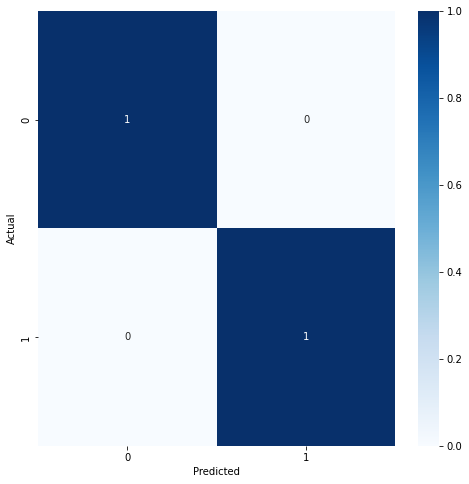

In [7]:
# Pad the sequences to make them the same length
X_padded = pad_sequences(data, padding="post", dtype="float32")

# Convert the data and labels to numpy arrays
X = np.array(X_padded)
y = np.array(labels)

# Flatten the data into a 2D array
n_samples, n_timesteps, n_features = X.shape
X_flat = X.reshape((n_samples, n_timesteps * n_features))

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_flat, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a random forest classifier and fit it to the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the training data
y_pred_train = clf.predict(X_train)
print("Training data classification report:")
print(classification_report(y_train, y_pred_train))

# Evaluate the classifier on the validation data
y_pred_val = clf.predict(X_val)
print("Validation data classification report:")
print(classification_report(y_val, y_pred_val))

# Evaluate the classifier on the testing data
y_pred_test = clf.predict(X_test)
print("Testing data classification report:")
print(classification_report(y_test, y_pred_test))

# Calculate and plot the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=np.unique(y_train_val), yticklabels=np.unique(y_train_val))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Feature Importance

Streaming output truncated to the last 5000 lines.
162721. feature 113360 (0.000000)
162722. feature 113359 (0.000000)
162723. feature 113358 (0.000000)
162724. feature 113357 (0.000000)
162725. feature 113356 (0.000000)
162726. feature 113413 (0.000000)
162727. feature 113415 (0.000000)
162728. feature 113495 (0.000000)
162729. feature 113456 (0.000000)
162730. feature 113474 (0.000000)
162731. feature 113473 (0.000000)
162732. feature 113472 (0.000000)
162733. feature 113471 (0.000000)
162734. feature 113470 (0.000000)
162735. feature 113469 (0.000000)
162736. feature 113468 (0.000000)
162737. feature 113467 (0.000000)
162738. feature 113466 (0.000000)
162739. feature 113465 (0.000000)
162740. feature 113464 (0.000000)
162741. feature 113463 (0.000000)
162742. feature 113462 (0.000000)
162743. feature 113461 (0.000000)
162744. feature 113460 (0.000000)
162745. feature 113459 (0.000000)
162746. feature 113458 (0.000000)
162747. feature 113475 (0.000000)
162748. feature 113476 (0.00000

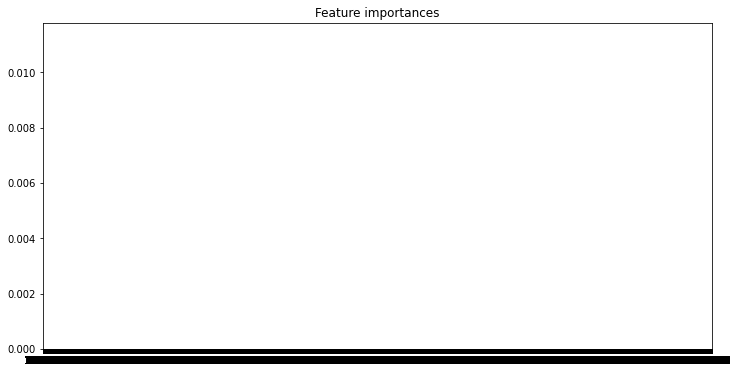

Text(0.5, 1.0, 'Confusion Matrix - Testing Data')

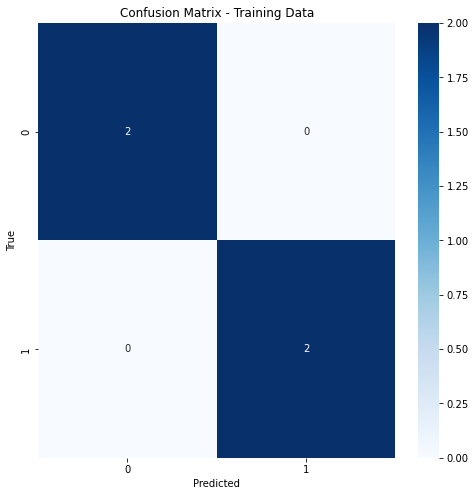

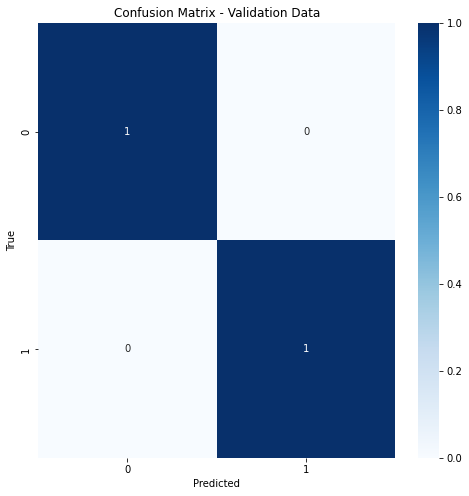

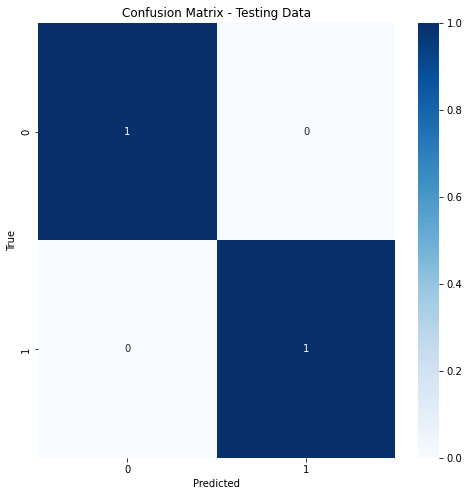

In [9]:
# Pad the sequences to make them the same length
X_padded = pad_sequences(data, padding="post", dtype="float32")

# Convert the data and labels to numpy arrays
X = np.array(X_padded)
y = np.array(labels)

# Flatten the data into a 2D array
n_samples, n_timesteps, n_features = X.shape
X_flat = X.reshape((n_samples, n_timesteps * n_features))

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a random forest classifier and fit it to the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the training data
y_pred_train = clf.predict(X_train)
print("Training data classification report:")
print(classification_report(y_train, y_pred_train))

# Evaluate the classifier on the validation data
y_pred_val = clf.predict(X_val)
print("Validation data classification report:")
print(classification_report(y_val, y_pred_val))

# Evaluate the classifier on the testing data
y_pred_test = clf.predict(X_test)
print("Testing data classification report:")
print(classification_report(y_test, y_pred_test))

# Extract the most important features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_flat.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_flat.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_flat.shape[1]), indices)
plt.xlim([-1, X_flat.shape[1]])
plt.show()

# Calculate and plot the confusion matrix for the training data
cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=np.unique(y_train_val), yticklabels=np.unique(y_train_val))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Training Data")

# Calculate and plot the confusion matrix for the validation data
cm = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=np.unique(y_train_val), yticklabels=np.unique(y_train_val))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Validation Data")

# Calculate and plot the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=np.unique(y_train_val), yticklabels=np.unique(y_train_val))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Testing Data")
